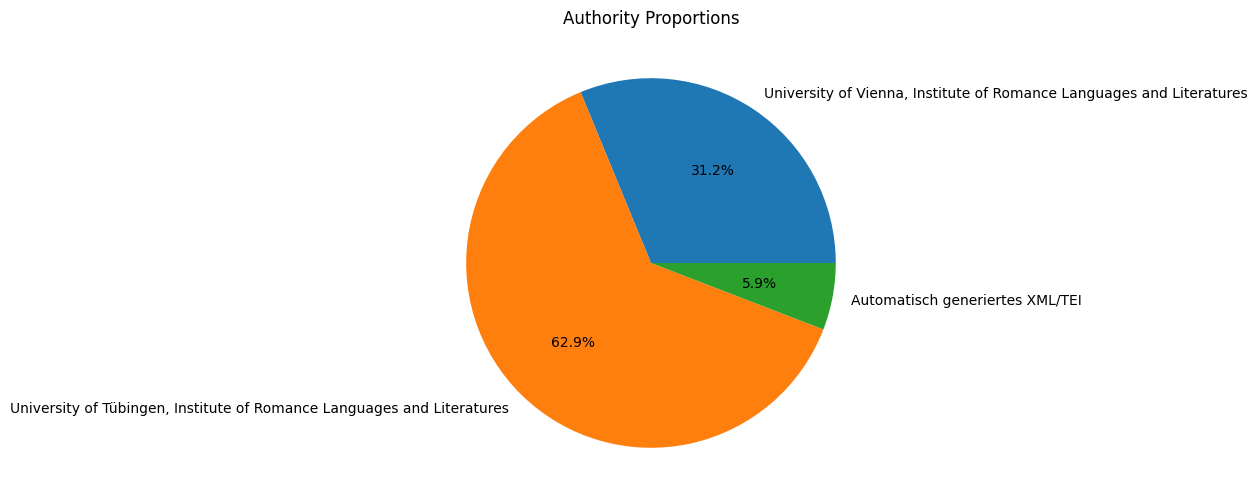

In [1]:
import os
import glob
import pandas as pd
import matplotlib.pyplot as plt
from xml.etree import ElementTree as ET

# Function to parse XML files and extract authority values
def parse_xml(xml_file):
    tree = ET.parse(xml_file)
    root = tree.getroot()
    authority_values = []
    for authority in root.findall('.//{http://www.tei-c.org/ns/1.0}authority'):
        authority_values.append(authority.text)
    return authority_values

# Function to count authority values and calculate proportions
def count_authority_values(xml_files):
    authority_counts = {}
    total_count = 0
    for xml_file in xml_files:
        authority_values = parse_xml(xml_file)
        total_count += len(authority_values)
        for value in authority_values:
            authority_counts[value] = authority_counts.get(value, 0) + 1
    
    # Calculate proportions
    for key in authority_counts:
        authority_counts[key] = (authority_counts[key], authority_counts[key] / total_count * 100)
    
    return authority_counts, total_count

# Define parent folder and output folder
parent_folder = "../results"
output_folder = "output"

# Create output folder if it doesn't exist
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

# Find all XML files in parent folder
xml_files = glob.glob(os.path.join(parent_folder, "*.xml"))

# Count authority values and calculate proportions
authority_counts, total_count = count_authority_values(xml_files)

# Create DataFrame
df = pd.DataFrame.from_dict(authority_counts, orient='index', columns=['Count', 'Proportion (%)'])

# Save DataFrame to CSV
df.to_csv(os.path.join(output_folder, 'authority_summary.csv'))

# Create pie chart
plt.figure(figsize=(10, 6))
plt.pie(df['Count'], labels=df.index, autopct='%1.1f%%')
plt.title('Authority Proportions')
plt.savefig(os.path.join(output_folder, 'authority_pie_chart.png'))
plt.show()
